In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sentiment Analaysis/Amazon_Mobile_Reviews/Amazon_Unlocked_Mobile_Updated.csv")
df.head()

,Rating,Reviews
0,1,I feel so LUCKY to have found this used (phone...
1,1,"nice phone, nice up grade from my pantach revu..."
2,1,Very pleased
3,1,It works good but it goes slow sometimes but i...
4,1,Great phone to replace my lost phone. The only...


In [ ]:
df.shape

(413840, 2)

In [ ]:
df.isnull().sum()

Rating     0
Reviews    0
dtype: int64

In [ ]:
df.tail()

,Rating,Reviews
413835,1,another great deal great price
413836,0,Ok
413837,1,Passes every drop test onto porcelain tile!
413838,0,I returned it because it did not meet my needs...
413839,1,Only downside is that apparently Verizon no lo...


In [ ]:
y = df["Rating"]
y

0         1
1         1
2         1
3         1
4         1
         ..
413835    1
413836    0
413837    1
413838    0
413839    1
Name: Rating, Length: 413840, dtype: int64

In [ ]:
reviews=df.copy()

import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import time
start = time.time()
from IPython.display import clear_output
corpus = []
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
for i in range(0,len(reviews)):
    print(i)
    clear_output(wait=True)
    data =  re.sub('[^a-zA-Z]', ' ', reviews["Reviews"][i])
    data = re.sub('<.*?>'," ",data)
    data = data.lower()
    data = data.split()
    data = [wordnet.lemmatize(word) for word in data if not word in stopwords.words('english')]
    data = ' '.join(data)
    corpus.append(data)
end = time.time()
print(end - start)
print(corpus)

In [ ]:
import pickle

In [ ]:
pickle.dump(corpus, open("corpus_amazon.pkl", "wb"))

In [ ]:
corpus = pickle.load(open("/content/drive/MyDrive/Sentiment Analaysis/Amazon_Mobile_Reviews/corpus_amazon.pkl", "rb"))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_2 = TfidfVectorizer(max_features=50000,ngram_range=(1,3))
X_tfid = cv_2.fit_transform(corpus)
X_tfid.shape

(413840, 50000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfid, y, test_size=0.20, random_state=0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
import numpy as np

y_pred=model.predict(X_test)
print(np.array(y_pred))

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[1 1 1 ... 1 1 1]
[[17276   346  2010]
 [ 1752  1881  2690]
 [ 1281   393 55139]] 89.76416006185966


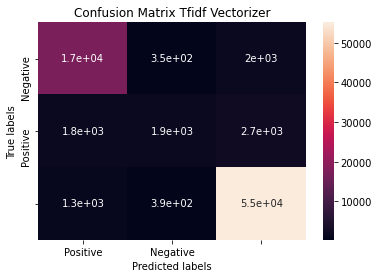

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Tfidf Vectorizer'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [wordnet.lemmatize(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv_2.transform(new_corpus).toarray()
    pred = model.predict(new_X_test)
    return pred

new_review = new_review(str(input("Enter new review...")))
print(new_review)
print()

if new_review == 1:
  print("Positive")
elif new_review == 0:
  print("Neutral")
elif new_review ==-1:
  print("Negative")

Enter new review...worst mobile ever
[-1]

Negative


In [ ]:
pickle.dump(model, open("model_mobile.pkl", "wb"))